In [1]:
from baseline_cnn import *
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as func
import torch.nn.init as torch_init
import torch.optim as optim

# Data utils and dataloader
import torchvision
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [2]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [3]:
# Check if your system supports CUDA
use_cuda = torch.cuda.is_available()

# Setup GPU optimization if CUDA is supported
if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: # Otherwise, train on the CPU
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")

CUDA NOT supported


## Load Data

In [9]:
# The images are all loaded as PIL Images. We need to transform these into Tensors,
# and we also do normalization.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Load all the images
trainset = loader("train.csv", "./", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True)
testset = loader("test.csv", "./", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False)

print(len(trainset), len(testset))

30030 3236


## Show a sample from the dataset

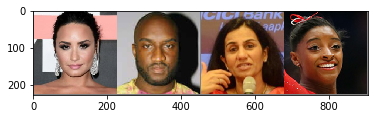

tensor([ 65, 139,  94,  19])


In [10]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next() # Batch_size is 4, so we get 4 images by calling next

# Places the images in a grid
imshow(torchvision.utils.make_grid(images))
print(labels)

## Create the network

In [11]:
net=Nnet().to(computing_device)
net.apply(weights_init)
print(net)

Nnet(
  (main): Sequential(
    (0): Conv2d(3, 21, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace=True)
    (2): Conv2d(21, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(20, 15, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Conv2d(15, 7, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
  )
  (fc): Sequential(
    (0): Linear(in_features=1183, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=201, bias=True)
    (3): Softmax(dim=None)
  )
)


## Define the Lossfunction and the Optimizer

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.0005) # net.parameters is the weights of the network.


## Train the network

In [17]:
# Track the loss across training
total_loss = []
avg_minibatch_loss = []
N = 50
PATH = "./cnn_celeb.pth" # Where to save the model

for epoch in range(1):
    N_minibatch_loss = 0.0

    # Get the next minibatch of images, labels for training
    for minibatch_count, (images, labels) in enumerate(trainloader, 0):
        print("Mini_batch:", minibatch_count)
        # Zero out the stored gradient (buffer) from the previous iteration
        optimizer.zero_grad()
        # Put the minibatch data in CUDA Tensors and run on the GPU if supported
        images, labels = images.to(computing_device), labels.to(computing_device)
        # Perform the forward pass through the network and compute the loss
        outputs = net(images)
       
        #labels= func.one_hot(labels, num_classes=201).type(torch.FloatTensor)
        loss = criterion(outputs, labels)
        # Automagically compute the gradients and backpropagate the loss through the network
        loss.backward()

        # Update the weights
        optimizer.step()    
        # Add this iteration's loss to the total_loss
        total_loss.append(loss.item())
        N_minibatch_loss += loss
               
        
        if minibatch_count % N == 49:
            #Print the loss averaged over the last N mini-batches
            N_minibatch_loss /= N
            print('Epoch %d, average minibatch %d loss: %.3f' % (epoch + 1, minibatch_count+1, N_minibatch_loss))
            # Add the averaged loss over N minibatches and reset the counter
            avg_minibatch_loss.append(N_minibatch_loss)
            N_minibatch_loss = 0.0

    print("Finished", epoch + 1, "epochs of training")
    print("Saving model...")
    torch.save(net.state_dict(), PATH)
    
    with torch.no_grad():
        # TODO: Implement validation #with torch.no_grad():
        pass

Mini_batch: 0
Mini_batch: 1
Mini_batch: 2
Mini_batch: 3
Mini_batch: 4
Mini_batch: 5
Mini_batch: 6
Mini_batch: 7
Mini_batch: 8
Mini_batch: 9
Mini_batch: 10
Mini_batch: 11
Mini_batch: 12
Mini_batch: 13
Mini_batch: 14
Mini_batch: 15
Mini_batch: 16
Mini_batch: 17
Mini_batch: 18
Mini_batch: 19
Mini_batch: 20
Mini_batch: 21
Mini_batch: 22
Mini_batch: 23
Mini_batch: 24
Mini_batch: 25
Mini_batch: 26
Mini_batch: 27
Mini_batch: 28
Mini_batch: 29
Mini_batch: 30
Mini_batch: 31
Mini_batch: 32
Mini_batch: 33
Mini_batch: 34
Mini_batch: 35
Mini_batch: 36
Mini_batch: 37
Mini_batch: 38
Mini_batch: 39
Mini_batch: 40
Mini_batch: 41
Mini_batch: 42
Mini_batch: 43
Mini_batch: 44
Mini_batch: 45
Mini_batch: 46
Mini_batch: 47
Mini_batch: 48
Mini_batch: 49
Epoch 1, average minibatch 50 loss: 5.299
Mini_batch: 50
Mini_batch: 51
Mini_batch: 52
Mini_batch: 53
Mini_batch: 54
Mini_batch: 55
Mini_batch: 56
Mini_batch: 57
Mini_batch: 58
Mini_batch: 59
Mini_batch: 60
Mini_batch: 61
Mini_batch: 62
Mini_batch: 63
Mini_bat

Mini_batch: 495
Mini_batch: 496
Mini_batch: 497
Mini_batch: 498
Mini_batch: 499
Epoch 1, average minibatch 500 loss: 5.279
Mini_batch: 500
Mini_batch: 501
Mini_batch: 502
Mini_batch: 503
Mini_batch: 504
Mini_batch: 505
Mini_batch: 506
Mini_batch: 507
Mini_batch: 508
Mini_batch: 509
Mini_batch: 510
Mini_batch: 511
Mini_batch: 512
Mini_batch: 513
Mini_batch: 514
Mini_batch: 515
Mini_batch: 516
Mini_batch: 517
Mini_batch: 518
Mini_batch: 519
Mini_batch: 520
Mini_batch: 521
Mini_batch: 522
Mini_batch: 523
Mini_batch: 524
Mini_batch: 525
Mini_batch: 526
Mini_batch: 527
Mini_batch: 528
Mini_batch: 529
Mini_batch: 530
Mini_batch: 531
Mini_batch: 532
Mini_batch: 533
Mini_batch: 534
Mini_batch: 535
Mini_batch: 536
Mini_batch: 537
Mini_batch: 538
Mini_batch: 539
Mini_batch: 540
Mini_batch: 541
Mini_batch: 542
Mini_batch: 543
Mini_batch: 544
Mini_batch: 545
Mini_batch: 546
Mini_batch: 547
Mini_batch: 548
Mini_batch: 549
Epoch 1, average minibatch 550 loss: 5.284
Mini_batch: 550
Mini_batch: 551
Mi

Mini_batch: 981
Mini_batch: 982
Mini_batch: 983
Mini_batch: 984
Mini_batch: 985
Mini_batch: 986
Mini_batch: 987
Mini_batch: 988
Mini_batch: 989
Mini_batch: 990
Mini_batch: 991
Mini_batch: 992
Mini_batch: 993
Mini_batch: 994
Mini_batch: 995
Mini_batch: 996
Mini_batch: 997
Mini_batch: 998
Mini_batch: 999
Epoch 1, average minibatch 1000 loss: 5.292
Mini_batch: 1000
Mini_batch: 1001
Mini_batch: 1002
Mini_batch: 1003
Mini_batch: 1004
Mini_batch: 1005
Mini_batch: 1006
Mini_batch: 1007
Mini_batch: 1008
Mini_batch: 1009
Mini_batch: 1010
Mini_batch: 1011
Mini_batch: 1012
Mini_batch: 1013
Mini_batch: 1014
Mini_batch: 1015
Mini_batch: 1016
Mini_batch: 1017
Mini_batch: 1018
Mini_batch: 1019
Mini_batch: 1020
Mini_batch: 1021
Mini_batch: 1022
Mini_batch: 1023
Mini_batch: 1024
Mini_batch: 1025
Mini_batch: 1026
Mini_batch: 1027
Mini_batch: 1028
Mini_batch: 1029
Mini_batch: 1030
Mini_batch: 1031
Mini_batch: 1032
Mini_batch: 1033
Mini_batch: 1034
Mini_batch: 1035
Mini_batch: 1036
Mini_batch: 1037
Mini_b

Mini_batch: 1443
Mini_batch: 1444
Mini_batch: 1445
Mini_batch: 1446
Mini_batch: 1447
Mini_batch: 1448
Mini_batch: 1449
Epoch 1, average minibatch 1450 loss: 5.290
Mini_batch: 1450
Mini_batch: 1451
Mini_batch: 1452
Mini_batch: 1453
Mini_batch: 1454
Mini_batch: 1455
Mini_batch: 1456
Mini_batch: 1457
Mini_batch: 1458
Mini_batch: 1459
Mini_batch: 1460
Mini_batch: 1461
Mini_batch: 1462
Mini_batch: 1463
Mini_batch: 1464
Mini_batch: 1465
Mini_batch: 1466
Mini_batch: 1467
Mini_batch: 1468
Mini_batch: 1469
Mini_batch: 1470
Mini_batch: 1471
Mini_batch: 1472
Mini_batch: 1473
Mini_batch: 1474
Mini_batch: 1475
Mini_batch: 1476
Mini_batch: 1477
Mini_batch: 1478
Mini_batch: 1479
Mini_batch: 1480
Mini_batch: 1481
Mini_batch: 1482
Mini_batch: 1483
Mini_batch: 1484
Mini_batch: 1485
Mini_batch: 1486
Mini_batch: 1487
Mini_batch: 1488
Mini_batch: 1489
Mini_batch: 1490
Mini_batch: 1491
Mini_batch: 1492
Mini_batch: 1493
Mini_batch: 1494
Mini_batch: 1495
Mini_batch: 1496
Mini_batch: 1497
Mini_batch: 1498
Mini

Mini_batch: 1901
Mini_batch: 1902
Mini_batch: 1903
Mini_batch: 1904
Mini_batch: 1905
Mini_batch: 1906
Mini_batch: 1907
Mini_batch: 1908
Mini_batch: 1909
Mini_batch: 1910
Mini_batch: 1911
Mini_batch: 1912
Mini_batch: 1913
Mini_batch: 1914
Mini_batch: 1915
Mini_batch: 1916
Mini_batch: 1917
Mini_batch: 1918
Mini_batch: 1919
Mini_batch: 1920
Mini_batch: 1921
Mini_batch: 1922
Mini_batch: 1923
Mini_batch: 1924
Mini_batch: 1925
Mini_batch: 1926
Mini_batch: 1927
Mini_batch: 1928
Mini_batch: 1929
Mini_batch: 1930
Mini_batch: 1931
Mini_batch: 1932
Mini_batch: 1933
Mini_batch: 1934
Mini_batch: 1935
Mini_batch: 1936
Mini_batch: 1937
Mini_batch: 1938
Mini_batch: 1939
Mini_batch: 1940
Mini_batch: 1941
Mini_batch: 1942
Mini_batch: 1943
Mini_batch: 1944
Mini_batch: 1945
Mini_batch: 1946
Mini_batch: 1947
Mini_batch: 1948
Mini_batch: 1949
Epoch 1, average minibatch 1950 loss: 5.274
Mini_batch: 1950
Mini_batch: 1951
Mini_batch: 1952
Mini_batch: 1953
Mini_batch: 1954
Mini_batch: 1955
Mini_batch: 1956
Mini

Mini_batch: 2363
Mini_batch: 2364
Mini_batch: 2365
Mini_batch: 2366
Mini_batch: 2367
Mini_batch: 2368
Mini_batch: 2369
Mini_batch: 2370
Mini_batch: 2371
Mini_batch: 2372
Mini_batch: 2373
Mini_batch: 2374
Mini_batch: 2375
Mini_batch: 2376
Mini_batch: 2377
Mini_batch: 2378
Mini_batch: 2379
Mini_batch: 2380
Mini_batch: 2381
Mini_batch: 2382
Mini_batch: 2383
Mini_batch: 2384
Mini_batch: 2385
Mini_batch: 2386
Mini_batch: 2387
Mini_batch: 2388
Mini_batch: 2389
Mini_batch: 2390
Mini_batch: 2391
Mini_batch: 2392
Mini_batch: 2393
Mini_batch: 2394
Mini_batch: 2395
Mini_batch: 2396
Mini_batch: 2397
Mini_batch: 2398
Mini_batch: 2399
Epoch 1, average minibatch 2400 loss: 5.292
Mini_batch: 2400
Mini_batch: 2401
Mini_batch: 2402
Mini_batch: 2403
Mini_batch: 2404
Mini_batch: 2405
Mini_batch: 2406
Mini_batch: 2407
Mini_batch: 2408
Mini_batch: 2409
Mini_batch: 2410
Mini_batch: 2411
Mini_batch: 2412
Mini_batch: 2413
Mini_batch: 2414
Mini_batch: 2415
Mini_batch: 2416
Mini_batch: 2417
Mini_batch: 2418
Mini

Mini_batch: 2825
Mini_batch: 2826
Mini_batch: 2827
Mini_batch: 2828
Mini_batch: 2829
Mini_batch: 2830
Mini_batch: 2831
Mini_batch: 2832
Mini_batch: 2833
Mini_batch: 2834
Mini_batch: 2835
Mini_batch: 2836
Mini_batch: 2837
Mini_batch: 2838
Mini_batch: 2839
Mini_batch: 2840
Mini_batch: 2841
Mini_batch: 2842
Mini_batch: 2843
Mini_batch: 2844
Mini_batch: 2845
Mini_batch: 2846
Mini_batch: 2847
Mini_batch: 2848
Mini_batch: 2849
Epoch 1, average minibatch 2850 loss: 5.297
Mini_batch: 2850
Mini_batch: 2851
Mini_batch: 2852
Mini_batch: 2853
Mini_batch: 2854
Mini_batch: 2855
Mini_batch: 2856
Mini_batch: 2857
Mini_batch: 2858
Mini_batch: 2859
Mini_batch: 2860
Mini_batch: 2861
Mini_batch: 2862
Mini_batch: 2863
Mini_batch: 2864
Mini_batch: 2865
Mini_batch: 2866
Mini_batch: 2867
Mini_batch: 2868
Mini_batch: 2869
Mini_batch: 2870
Mini_batch: 2871
Mini_batch: 2872
Mini_batch: 2873
Mini_batch: 2874
Mini_batch: 2875
Mini_batch: 2876
Mini_batch: 2877
Mini_batch: 2878
Mini_batch: 2879
Mini_batch: 2880
Mini

Mini_batch: 3286
Mini_batch: 3287
Mini_batch: 3288
Mini_batch: 3289
Mini_batch: 3290
Mini_batch: 3291
Mini_batch: 3292
Mini_batch: 3293
Mini_batch: 3294
Mini_batch: 3295
Mini_batch: 3296
Mini_batch: 3297
Mini_batch: 3298
Mini_batch: 3299
Epoch 1, average minibatch 3300 loss: 5.287
Mini_batch: 3300
Mini_batch: 3301
Mini_batch: 3302
Mini_batch: 3303
Mini_batch: 3304
Mini_batch: 3305
Mini_batch: 3306
Mini_batch: 3307
Mini_batch: 3308
Mini_batch: 3309
Mini_batch: 3310
Mini_batch: 3311
Mini_batch: 3312
Mini_batch: 3313
Mini_batch: 3314
Mini_batch: 3315
Mini_batch: 3316
Mini_batch: 3317
Mini_batch: 3318
Mini_batch: 3319
Mini_batch: 3320
Mini_batch: 3321
Mini_batch: 3322
Mini_batch: 3323
Mini_batch: 3324
Mini_batch: 3325
Mini_batch: 3326
Mini_batch: 3327
Mini_batch: 3328
Mini_batch: 3329
Mini_batch: 3330
Mini_batch: 3331
Mini_batch: 3332
Mini_batch: 3333
Mini_batch: 3334
Mini_batch: 3335
Mini_batch: 3336
Mini_batch: 3337
Mini_batch: 3338
Mini_batch: 3339
Mini_batch: 3340
Mini_batch: 3341
Mini

Mini_batch: 3745
Mini_batch: 3746
Mini_batch: 3747
Mini_batch: 3748
Mini_batch: 3749
Epoch 1, average minibatch 3750 loss: 5.291
Mini_batch: 3750
Mini_batch: 3751
Mini_batch: 3752
Mini_batch: 3753
Mini_batch: 3754
Mini_batch: 3755
Mini_batch: 3756
Mini_batch: 3757
Mini_batch: 3758
Mini_batch: 3759
Mini_batch: 3760
Mini_batch: 3761
Mini_batch: 3762
Mini_batch: 3763
Mini_batch: 3764
Mini_batch: 3765
Mini_batch: 3766
Mini_batch: 3767
Mini_batch: 3768
Mini_batch: 3769
Mini_batch: 3770
Mini_batch: 3771
Mini_batch: 3772
Mini_batch: 3773
Mini_batch: 3774
Mini_batch: 3775
Mini_batch: 3776
Mini_batch: 3777
Mini_batch: 3778
Mini_batch: 3779
Mini_batch: 3780
Mini_batch: 3781
Mini_batch: 3782
Mini_batch: 3783
Mini_batch: 3784
Mini_batch: 3785
Mini_batch: 3786
Mini_batch: 3787
Mini_batch: 3788
Mini_batch: 3789
Mini_batch: 3790
Mini_batch: 3791
Mini_batch: 3792
Mini_batch: 3793
Mini_batch: 3794
Mini_batch: 3795
Mini_batch: 3796
Mini_batch: 3797
Mini_batch: 3798
Mini_batch: 3799
Epoch 1, average mini

Mini_batch: 4203
Mini_batch: 4204
Mini_batch: 4205
Mini_batch: 4206
Mini_batch: 4207
Mini_batch: 4208
Mini_batch: 4209
Mini_batch: 4210
Mini_batch: 4211
Mini_batch: 4212
Mini_batch: 4213
Mini_batch: 4214
Mini_batch: 4215
Mini_batch: 4216
Mini_batch: 4217
Mini_batch: 4218
Mini_batch: 4219
Mini_batch: 4220
Mini_batch: 4221
Mini_batch: 4222
Mini_batch: 4223
Mini_batch: 4224
Mini_batch: 4225
Mini_batch: 4226
Mini_batch: 4227
Mini_batch: 4228
Mini_batch: 4229
Mini_batch: 4230
Mini_batch: 4231
Mini_batch: 4232
Mini_batch: 4233
Mini_batch: 4234
Mini_batch: 4235
Mini_batch: 4236
Mini_batch: 4237
Mini_batch: 4238
Mini_batch: 4239
Mini_batch: 4240
Mini_batch: 4241
Mini_batch: 4242
Mini_batch: 4243
Mini_batch: 4244
Mini_batch: 4245
Mini_batch: 4246
Mini_batch: 4247
Mini_batch: 4248
Mini_batch: 4249
Epoch 1, average minibatch 4250 loss: 5.268
Mini_batch: 4250
Mini_batch: 4251
Mini_batch: 4252
Mini_batch: 4253
Mini_batch: 4254
Mini_batch: 4255
Mini_batch: 4256
Mini_batch: 4257
Mini_batch: 4258
Mini

Mini_batch: 4665
Mini_batch: 4666
Mini_batch: 4667
Mini_batch: 4668
Mini_batch: 4669
Mini_batch: 4670
Mini_batch: 4671
Mini_batch: 4672
Mini_batch: 4673
Mini_batch: 4674
Mini_batch: 4675
Mini_batch: 4676
Mini_batch: 4677
Mini_batch: 4678
Mini_batch: 4679
Mini_batch: 4680
Mini_batch: 4681
Mini_batch: 4682
Mini_batch: 4683
Mini_batch: 4684
Mini_batch: 4685
Mini_batch: 4686
Mini_batch: 4687
Mini_batch: 4688
Mini_batch: 4689
Mini_batch: 4690
Mini_batch: 4691
Mini_batch: 4692
Mini_batch: 4693
Mini_batch: 4694
Mini_batch: 4695
Mini_batch: 4696
Mini_batch: 4697
Mini_batch: 4698
Mini_batch: 4699
Epoch 1, average minibatch 4700 loss: 5.278
Mini_batch: 4700
Mini_batch: 4701
Mini_batch: 4702
Mini_batch: 4703
Mini_batch: 4704
Mini_batch: 4705
Mini_batch: 4706
Mini_batch: 4707
Mini_batch: 4708
Mini_batch: 4709
Mini_batch: 4710
Mini_batch: 4711
Mini_batch: 4712
Mini_batch: 4713
Mini_batch: 4714
Mini_batch: 4715
Mini_batch: 4716
Mini_batch: 4717
Mini_batch: 4718
Mini_batch: 4719
Mini_batch: 4720
Mini

Mini_batch: 5127
Mini_batch: 5128
Mini_batch: 5129
Mini_batch: 5130
Mini_batch: 5131
Mini_batch: 5132
Mini_batch: 5133
Mini_batch: 5134
Mini_batch: 5135
Mini_batch: 5136
Mini_batch: 5137
Mini_batch: 5138
Mini_batch: 5139
Mini_batch: 5140
Mini_batch: 5141
Mini_batch: 5142
Mini_batch: 5143
Mini_batch: 5144
Mini_batch: 5145
Mini_batch: 5146
Mini_batch: 5147
Mini_batch: 5148
Mini_batch: 5149
Epoch 1, average minibatch 5150 loss: 5.292
Mini_batch: 5150
Mini_batch: 5151
Mini_batch: 5152
Mini_batch: 5153
Mini_batch: 5154
Mini_batch: 5155
Mini_batch: 5156
Mini_batch: 5157
Mini_batch: 5158
Mini_batch: 5159
Mini_batch: 5160
Mini_batch: 5161
Mini_batch: 5162
Mini_batch: 5163
Mini_batch: 5164
Mini_batch: 5165
Mini_batch: 5166
Mini_batch: 5167
Mini_batch: 5168
Mini_batch: 5169
Mini_batch: 5170
Mini_batch: 5171
Mini_batch: 5172
Mini_batch: 5173
Mini_batch: 5174
Mini_batch: 5175
Mini_batch: 5176
Mini_batch: 5177
Mini_batch: 5178
Mini_batch: 5179
Mini_batch: 5180
Mini_batch: 5181
Mini_batch: 5182
Mini

Mini_batch: 5589
Mini_batch: 5590
Mini_batch: 5591
Mini_batch: 5592
Mini_batch: 5593
Mini_batch: 5594
Mini_batch: 5595
Mini_batch: 5596
Mini_batch: 5597
Mini_batch: 5598
Mini_batch: 5599
Epoch 1, average minibatch 5600 loss: 5.258
Mini_batch: 5600
Mini_batch: 5601
Mini_batch: 5602
Mini_batch: 5603
Mini_batch: 5604
Mini_batch: 5605
Mini_batch: 5606
Mini_batch: 5607
Mini_batch: 5608
Mini_batch: 5609
Mini_batch: 5610
Mini_batch: 5611
Mini_batch: 5612
Mini_batch: 5613
Mini_batch: 5614
Mini_batch: 5615
Mini_batch: 5616
Mini_batch: 5617
Mini_batch: 5618
Mini_batch: 5619
Mini_batch: 5620
Mini_batch: 5621
Mini_batch: 5622
Mini_batch: 5623
Mini_batch: 5624
Mini_batch: 5625
Mini_batch: 5626
Mini_batch: 5627
Mini_batch: 5628
Mini_batch: 5629
Mini_batch: 5630
Mini_batch: 5631
Mini_batch: 5632
Mini_batch: 5633
Mini_batch: 5634
Mini_batch: 5635
Mini_batch: 5636
Mini_batch: 5637
Mini_batch: 5638
Mini_batch: 5639
Mini_batch: 5640
Mini_batch: 5641
Mini_batch: 5642
Mini_batch: 5643
Mini_batch: 5644
Mini

Mini_batch: 6051
Mini_batch: 6052
Mini_batch: 6053
Mini_batch: 6054
Mini_batch: 6055
Mini_batch: 6056
Mini_batch: 6057
Mini_batch: 6058
Mini_batch: 6059
Mini_batch: 6060
Mini_batch: 6061
Mini_batch: 6062
Mini_batch: 6063
Mini_batch: 6064
Mini_batch: 6065
Mini_batch: 6066
Mini_batch: 6067
Mini_batch: 6068
Mini_batch: 6069
Mini_batch: 6070
Mini_batch: 6071
Mini_batch: 6072
Mini_batch: 6073
Mini_batch: 6074
Mini_batch: 6075
Mini_batch: 6076
Mini_batch: 6077
Mini_batch: 6078
Mini_batch: 6079
Mini_batch: 6080
Mini_batch: 6081
Mini_batch: 6082
Mini_batch: 6083
Mini_batch: 6084
Mini_batch: 6085
Mini_batch: 6086
Mini_batch: 6087
Mini_batch: 6088
Mini_batch: 6089
Mini_batch: 6090
Mini_batch: 6091
Mini_batch: 6092
Mini_batch: 6093
Mini_batch: 6094
Mini_batch: 6095
Mini_batch: 6096
Mini_batch: 6097
Mini_batch: 6098
Mini_batch: 6099
Epoch 1, average minibatch 6100 loss: 5.282
Mini_batch: 6100
Mini_batch: 6101
Mini_batch: 6102
Mini_batch: 6103
Mini_batch: 6104
Mini_batch: 6105
Mini_batch: 6106
Mini

Mini_batch: 6511
Mini_batch: 6512
Mini_batch: 6513
Mini_batch: 6514
Mini_batch: 6515
Mini_batch: 6516
Mini_batch: 6517
Mini_batch: 6518
Mini_batch: 6519
Mini_batch: 6520
Mini_batch: 6521
Mini_batch: 6522
Mini_batch: 6523
Mini_batch: 6524
Mini_batch: 6525
Mini_batch: 6526
Mini_batch: 6527
Mini_batch: 6528
Mini_batch: 6529
Mini_batch: 6530
Mini_batch: 6531
Mini_batch: 6532
Mini_batch: 6533
Mini_batch: 6534
Mini_batch: 6535
Mini_batch: 6536
Mini_batch: 6537
Mini_batch: 6538
Mini_batch: 6539
Mini_batch: 6540
Mini_batch: 6541
Mini_batch: 6542
Mini_batch: 6543
Mini_batch: 6544
Mini_batch: 6545
Mini_batch: 6546
Mini_batch: 6547
Mini_batch: 6548
Mini_batch: 6549
Epoch 1, average minibatch 6550 loss: 5.274
Mini_batch: 6550
Mini_batch: 6551
Mini_batch: 6552
Mini_batch: 6553
Mini_batch: 6554
Mini_batch: 6555
Mini_batch: 6556
Mini_batch: 6557
Mini_batch: 6558
Mini_batch: 6559
Mini_batch: 6560
Mini_batch: 6561
Mini_batch: 6562
Mini_batch: 6563
Mini_batch: 6564
Mini_batch: 6565
Mini_batch: 6566
Mini

Mini_batch: 6971
Mini_batch: 6972
Mini_batch: 6973
Mini_batch: 6974
Mini_batch: 6975
Mini_batch: 6976
Mini_batch: 6977
Mini_batch: 6978
Mini_batch: 6979
Mini_batch: 6980
Mini_batch: 6981
Mini_batch: 6982
Mini_batch: 6983
Mini_batch: 6984
Mini_batch: 6985
Mini_batch: 6986
Mini_batch: 6987
Mini_batch: 6988
Mini_batch: 6989
Mini_batch: 6990
Mini_batch: 6991
Mini_batch: 6992
Mini_batch: 6993
Mini_batch: 6994
Mini_batch: 6995
Mini_batch: 6996
Mini_batch: 6997
Mini_batch: 6998
Mini_batch: 6999
Epoch 1, average minibatch 7000 loss: 5.276
Mini_batch: 7000
Mini_batch: 7001
Mini_batch: 7002
Mini_batch: 7003
Mini_batch: 7004
Mini_batch: 7005
Mini_batch: 7006
Mini_batch: 7007
Mini_batch: 7008
Mini_batch: 7009
Mini_batch: 7010
Mini_batch: 7011
Mini_batch: 7012
Mini_batch: 7013
Mini_batch: 7014
Mini_batch: 7015
Mini_batch: 7016
Mini_batch: 7017
Mini_batch: 7018
Mini_batch: 7019
Mini_batch: 7020
Mini_batch: 7021
Mini_batch: 7022
Mini_batch: 7023
Mini_batch: 7024
Mini_batch: 7025
Mini_batch: 7026
Mini

Mini_batch: 7433
Mini_batch: 7434
Mini_batch: 7435
Mini_batch: 7436
Mini_batch: 7437
Mini_batch: 7438
Mini_batch: 7439
Mini_batch: 7440
Mini_batch: 7441
Mini_batch: 7442
Mini_batch: 7443
Mini_batch: 7444
Mini_batch: 7445
Mini_batch: 7446
Mini_batch: 7447
Mini_batch: 7448
Mini_batch: 7449
Epoch 1, average minibatch 7450 loss: 5.261
Mini_batch: 7450
Mini_batch: 7451
Mini_batch: 7452
Mini_batch: 7453
Mini_batch: 7454
Mini_batch: 7455
Mini_batch: 7456
Mini_batch: 7457
Mini_batch: 7458
Mini_batch: 7459
Mini_batch: 7460
Mini_batch: 7461
Mini_batch: 7462
Mini_batch: 7463
Mini_batch: 7464
Mini_batch: 7465
Mini_batch: 7466
Mini_batch: 7467
Mini_batch: 7468
Mini_batch: 7469
Mini_batch: 7470
Mini_batch: 7471
Mini_batch: 7472
Mini_batch: 7473
Mini_batch: 7474
Mini_batch: 7475
Mini_batch: 7476
Mini_batch: 7477
Mini_batch: 7478
Mini_batch: 7479
Mini_batch: 7480
Mini_batch: 7481
Mini_batch: 7482
Mini_batch: 7483
Mini_batch: 7484
Mini_batch: 7485
Mini_batch: 7486
Mini_batch: 7487
Mini_batch: 7488
Mini

## Test the model

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader: # Remember they come in batches
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on test images: 3 %
